# **Analyzing data on cardiovascular diseases (searching for insights, making recommendations to stakeholders, building a predictive model to classify the presence of the disease)**

The relevance of this study lies in the growing number of cases of cardiovascular diseases and the need to predict the risk of their development. Our customer, Medica+ Medical Center, is interested in creating a tool to assess the likelihood of cardiovascular diseases in patients based on their medical indicators. This will allow for more effective prevention and individualized recommendations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Description of the source dataset and data types**

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


The data in the dataset are represented in int64 and float64 formats, so no change of data types is required. The total number of rows in the dataset is 70000. There are 13 columns describing patient characteristics:
- id - Patient number (data type - int64);
- age - Patient's age (data type - int64);
- gender - Patient gender (data type - int64);
- height - Patient height (data type - int64);
- weight - Patient weight (data type - float64);
- ap_hi - Systolic blood pressure (data type - int64);
- ap_lo - Diastolic blood pressure (data type - int64);
- cholesterol - Cholesterol (data type - int64);
- gluc - Glucose (data type - int64);
- smoke - Smoking (data type - int64);
- alco - Alcohol use (data type - int64);
- active - Physical activity (data type - int64);
- cardio - Presence or absence of cardiovascular disease (data type - int64).

In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**Data preparation and conversion**

In [5]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


In [6]:
print(df.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [7]:
df['age'] = df['age'] / 365.25
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0


**Data cleansing**

In [8]:
# Removal of emissions
lower_bound_age = df['age'].quantile(0.05)
upper_bound_age = df['age'].quantile(0.95)

df_cleaned = df[(df['age'] >= lower_bound_age) & (df['age'] <= upper_bound_age)]
outliers_age = df[~df['age'].between(lower_bound_age, upper_bound_age, inclusive=True)]
outliers_age

<ipython-input-8-38b35e3e8241>:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  outliers_age = df[~df['age'].between(lower_bound_age, upper_bound_age, inclusive=True)]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
12,18,40.495551,2,165,60.0,120,80,1,1,0,0,0,0
14,23,39.786448,2,181,95.0,130,90,1,1,1,1,1,0
23,33,64.000000,2,156,45.0,110,60,1,1,0,0,1,0
25,36,39.570157,1,153,65.0,130,100,2,1,0,0,1,0
28,39,39.901437,2,166,66.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69928,99890,39.479808,1,160,55.0,140,90,1,1,0,0,1,0
69936,99906,64.101300,2,171,70.0,140,90,1,1,0,0,1,0
69937,99908,39.668720,1,160,53.0,90,60,1,1,0,0,1,0
69944,99922,64.240931,2,170,97.0,130,90,2,1,0,0,1,1


In [9]:
lower_bound_height = df['height'].quantile(0.05)
upper_bound_height = df['height'].quantile(0.95)

df_cleaned_height = df[(df['height'] >= lower_bound_height) & (df['height'] <= upper_bound_height)]
outliers_height = df[~df['height'].between(lower_bound_height, upper_bound_height, inclusive=True)]
outliers_height

<ipython-input-9-e70d4c1f966c>:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  outliers_height = df[~df['height'].between(lower_bound_height, upper_bound_height, inclusive=True)]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
5,8,59.997262,1,151,67.0,120,80,2,2,0,0,0,0
14,23,39.786448,2,181,95.0,130,90,1,1,1,1,1,0
62,81,55.660507,2,187,115.0,130,90,1,1,0,1,1,0
65,87,59.553730,1,148,80.0,130,90,1,1,0,0,1,1
71,96,59.887748,2,179,95.0,150,90,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69975,99963,58.217659,2,182,100.0,120,80,1,1,0,0,1,1
69981,99972,47.912389,2,182,110.0,130,90,2,2,0,0,1,1
69986,99978,49.823409,2,180,78.0,120,80,1,1,0,0,1,0
69987,99979,51.613963,1,151,49.0,120,80,1,1,0,0,1,0


In [10]:
lower_bound_weight = df['weight'].quantile(0.05)
upper_bound_weight = df['weight'].quantile(0.95)

df_cleaned_weight = df[(df['weight'] >= lower_bound_weight) & (df['weight'] <= upper_bound_weight)]
outliers_weight = df[~df['weight'].between(lower_bound_weight, upper_bound_weight, inclusive=True)]
outliers_weight

<ipython-input-10-8a8a52084b25>:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  outliers_weight = df[~df['weight'].between(lower_bound_weight, upper_bound_weight, inclusive=True)]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
15,24,45.946612,2,172,112.0,120,80,1,1,0,0,0,1
17,27,45.850787,1,158,52.0,110,70,1,3,0,0,1,0
23,33,64.000000,2,156,45.0,110,60,1,1,0,0,1,0
30,42,50.078029,1,155,105.0,120,80,3,1,0,0,1,1
44,59,54.110883,1,154,50.0,170,80,3,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69981,99972,47.912389,2,182,110.0,130,90,2,2,0,0,1,1
69985,99977,49.812457,1,156,102.0,130,80,1,1,0,1,0,1
69987,99979,51.613963,1,151,49.0,120,80,1,1,0,0,1,0
69996,99995,61.878166,1,158,126.0,140,90,2,2,0,0,1,1


In [11]:
lower_bound_ap_hi = df['ap_hi'].quantile(0.05)
upper_bound_ap_hi = df['ap_hi'].quantile(0.95)

df_cleaned_ap_hi = df[(df['ap_hi'] >= lower_bound_ap_hi) & (df['ap_hi'] <= upper_bound_ap_hi)]
outliers_ap_hi = df[~df['ap_hi'].between(lower_bound_ap_hi, upper_bound_ap_hi, inclusive=True)]
outliers_ap_hi

<ipython-input-11-8a8ebce9f37b>:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  outliers_ap_hi = df[~df['ap_hi'].between(lower_bound_ap_hi, upper_bound_ap_hi, inclusive=True)]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
44,59,54.110883,1,154,50.0,170,80,3,1,0,0,1,1
56,71,47.657769,1,171,76.0,90,60,1,2,0,0,1,0
59,74,55.937029,1,164,64.0,180,90,1,1,1,0,1,1
61,79,57.385352,2,165,75.0,180,90,3,1,0,0,1,1
101,136,51.247091,1,167,80.0,190,90,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69937,99908,39.668720,1,160,53.0,90,60,1,1,0,0,1,0
69949,99932,60.558522,1,167,68.0,167,85,3,1,0,0,1,1
69978,99967,51.471595,1,163,78.0,90,60,1,1,0,0,1,1
69992,99990,51.449692,1,161,56.0,170,90,1,1,0,0,1,1


In [12]:
lower_bound_ap_lo = df['ap_lo'].quantile(0.05)
upper_bound_ap_lo = df['ap_lo'].quantile(0.95)

df_cleaned_ap_lo = df[(df['ap_lo'] >= lower_bound_ap_lo) & (df['ap_lo'] <= upper_bound_ap_lo)]
outliers_ap_lo = df[~df['ap_lo'].between(lower_bound_ap_lo, upper_bound_ap_lo, inclusive=True)]
outliers_ap_lo

<ipython-input-12-e7eb077898a6>:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  outliers_ap_lo = df[~df['ap_lo'].between(lower_bound_ap_lo, upper_bound_ap_lo, inclusive=True)]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4,4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0
9,14,54.302533,1,164,68.0,110,60,1,1,0,0,0,0
23,33,64.000000,2,156,45.0,110,60,1,1,0,0,1,0
43,58,56.279261,2,159,63.0,120,60,1,1,0,0,1,1
50,65,49.932923,1,160,75.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69929,99891,54.302533,1,164,85.0,165,110,3,3,0,0,1,1
69932,99897,41.733060,2,171,67.0,110,60,1,1,0,0,1,0
69937,99908,39.668720,1,160,53.0,90,60,1,1,0,0,1,0
69967,99955,58.633812,2,168,63.0,140,1000,1,1,0,0,1,1


**Analyzing data for stakeholders**

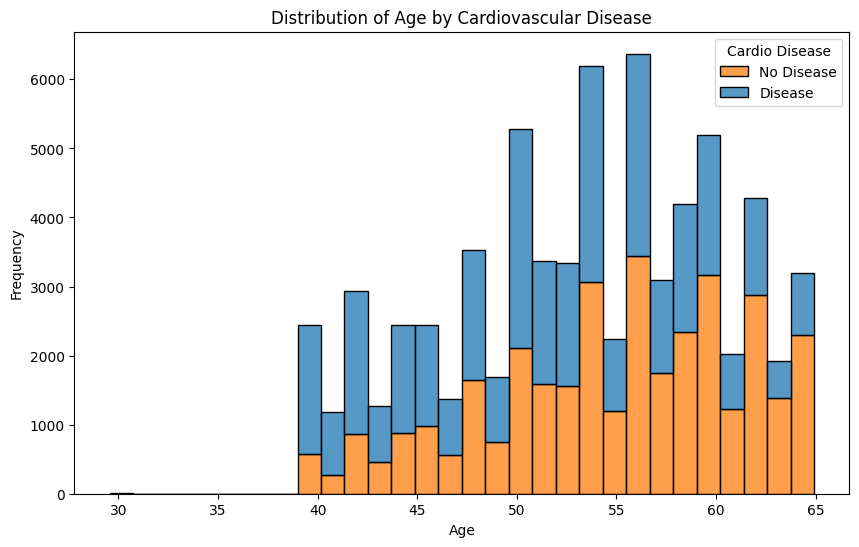

In [13]:
# Visualization of age distribution by grade
plt.figure(figsize=(10, 6))
sns.histplot(df, x='age', hue='cardio', bins=30, multiple='stack')
plt.title('Distribution of Age by Cardiovascular Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Cardio Disease', labels=['No Disease', 'Disease'])
plt.show()

The number of cardiovascular disease patients increases from about 38 years of age. A sharp increase is observed between 50 and 57 years of age.

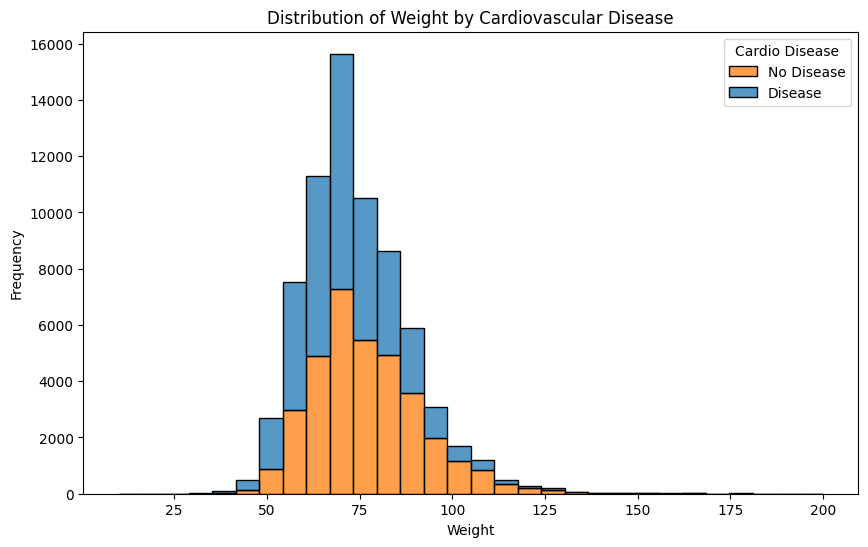

In [14]:
# Visualization of weight distribution by class
plt.figure(figsize=(10, 6))
sns.histplot(df, x='weight', hue='cardio', bins=30, multiple='stack')
plt.title('Distribution of Weight by Cardiovascular Disease')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend(title='Cardio Disease', labels=['No Disease', 'Disease'])
plt.show()

It can be seen that the dramatic increase in cardiovascular disease patients starts at 55 kilograms. The largest number of patients weighs about 70-75 kilograms.

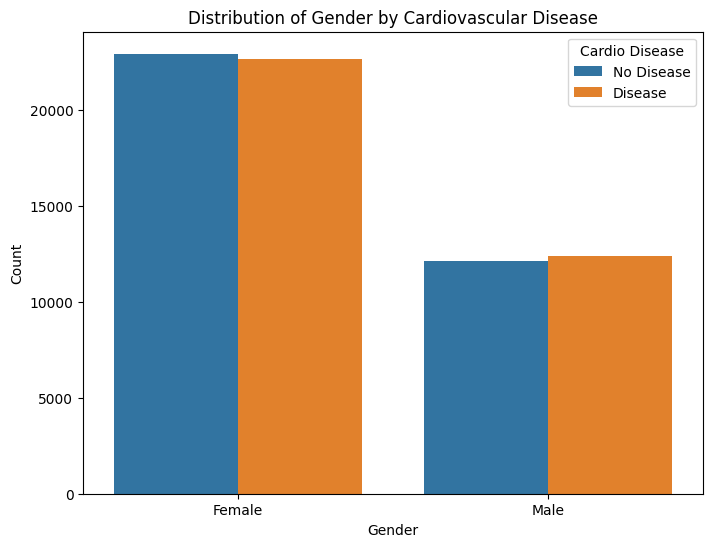

In [15]:
# Visualization of gender distribution by class
plt.figure(figsize=(8, 6))
sns.countplot(df, x='gender', hue='cardio')
plt.title('Distribution of Gender by Cardiovascular Disease')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Cardio Disease', labels=['No Disease', 'Disease'])
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

Among male patients there were more patients with cardiovascular diseases than among women. Almost half of the patients of both sexes have cardiovascular disease.

**Finding and describing data dependencies**

In [16]:
# Finding the top 5 lowest values by age for people with the disease
top_age_disease = df[df['cardio'] == 1].sort_values(by='age').head(5)
print(top_age_disease[['age', 'gender', 'weight', 'cholesterol']])

             age  gender  weight  cholesterol
31762  39.082820       1   105.0            3
23691  39.088296       2   109.0            1
53806  39.115674       2    85.0            1
54690  39.126626       1    53.0            1
63822  39.132101       2   100.0            3


The top 5 lowest age values of patients suffering from cardiovascular diseases were obtained. It is worth noting that the weight of almost all patients is quite high.

In [17]:
# Data sampling for people with the disease
people_with_disease = df[df['cardio'] == 1]

# Finding the top 5 weight values for people with the disease
top_weight_disease = people_with_disease.nlargest(5, 'weight')

print("Top 5 weights for people with cardiovascular disease:")
print(top_weight_disease[['weight', 'age', 'gender', 'cholesterol']])

Top 5 weights for people with cardiovascular disease:
       weight        age  gender  cholesterol
50413   200.0  41.388090       2            1
61285   183.0  57.327858       2            3
36780   181.0  53.744011       1            2
4743    180.0  47.140315       2            1
45378   180.0  47.687885       2            2


Almost all patients with maximum overweight were male. The maximum weight of a patient suffering from this disease is 200 kilograms.

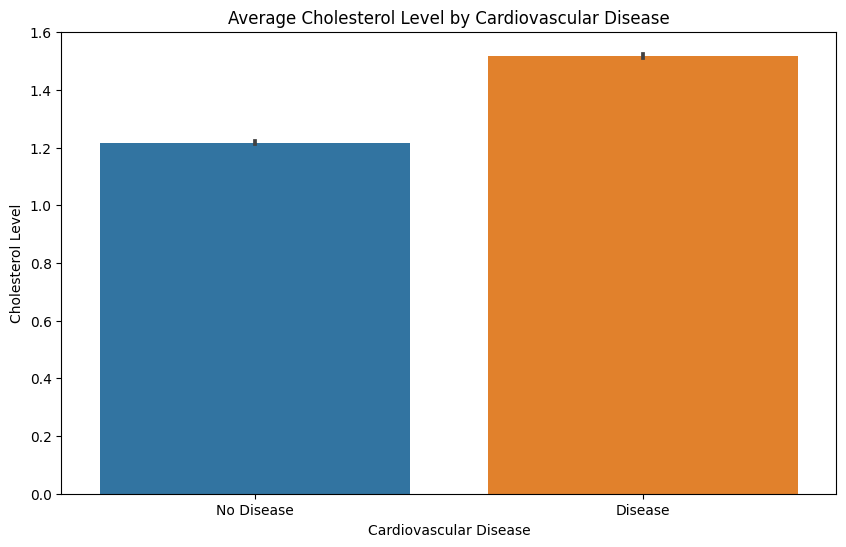

In [18]:
# Visualization of mean cholesterol levels according to the presence of disease
plt.figure(figsize=(10, 6))
sns.barplot(df, x='cardio', y='cholesterol')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Cholesterol Level')
plt.title('Average Cholesterol Level by Cardiovascular Disease')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])
plt.show()

It may be noted that the higher the cholesterol level, the higher the risk of cardiovascular disease.

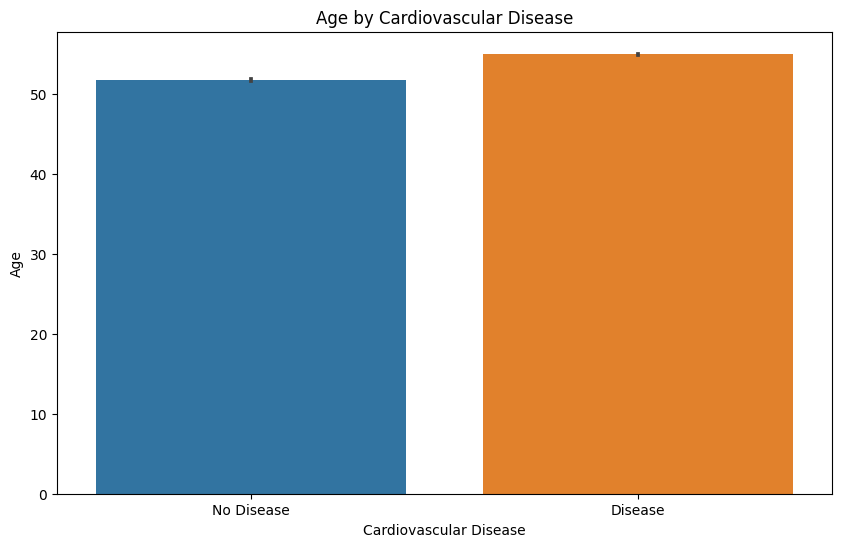

In [19]:
# Visualization of age in relation to the presence of disease
plt.figure(figsize=(10, 6))
sns.barplot(df, x='cardio', y='age')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Age')
plt.title('Age by Cardiovascular Disease')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])
plt.show()

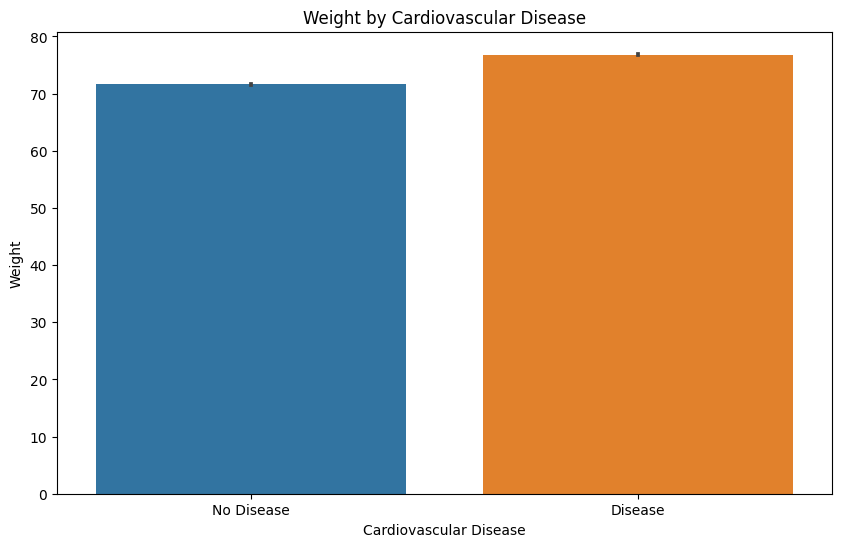

In [20]:
# Visualization of weight according to the presence of disease
plt.figure(figsize=(10, 6))
sns.barplot(df, x='cardio', y='weight')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Weight')
plt.title('Weight by Cardiovascular Disease')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])
plt.show()

The higher the patient's age and weight, the higher the risk of cardiovascular disease.

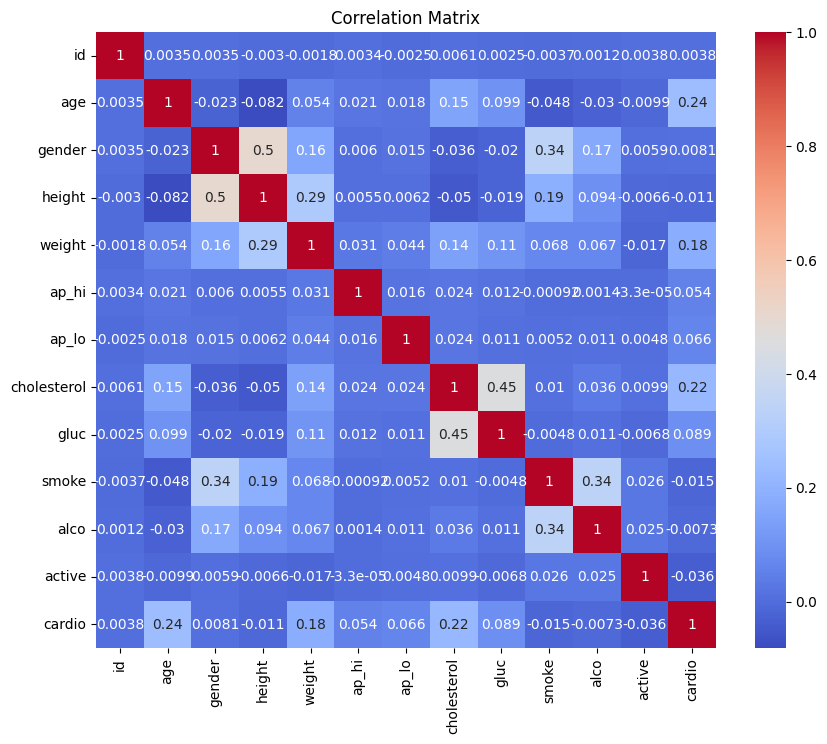

In [21]:
# Correlation matrix for estimation of dependencies
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

There is a strong correlation between age, weight, cholesterol levels and the likelihood of developing cardiovascular disease. There is a weak correlation between smoking, physical activity and the likelihood of developing the disease.

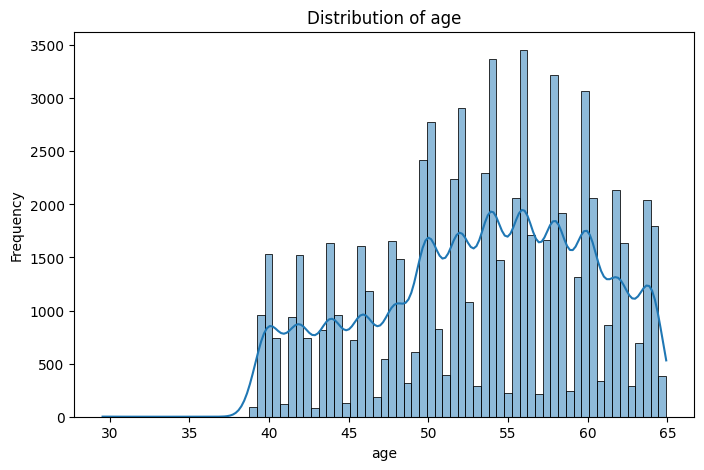

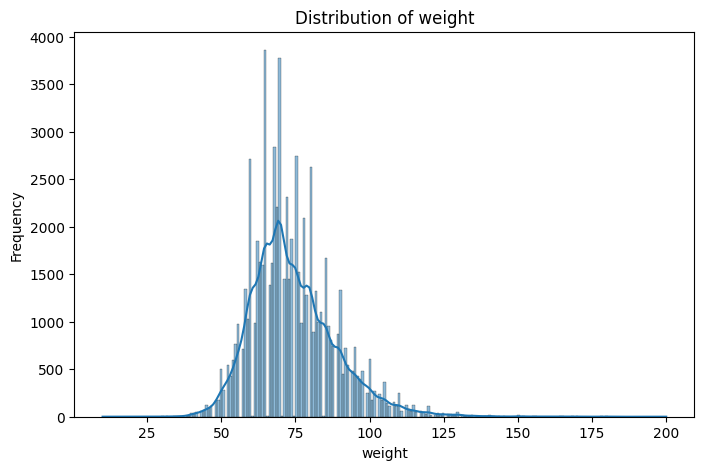

In [22]:
# Distribution of the studied features
features_to_plot = ['age', 'weight']

# Creating distribution graphs for each attribute
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

It can be concluded that the distribution of the studied samples is normal or near-normal.

**Statistical Hypothesis Testing**

In [23]:
# Age limit for grouping into groups
age_threshold = 50

# Creation of two groups: below the threshold and above the threshold
below_threshold = df[df['age'] <= age_threshold]['cardio']
above_threshold = df[df['age'] > age_threshold]['cardio']

# Preparation of samples for statistical analysis (sample size equalization)
min_sample_size = min(len(below_threshold), len(above_threshold))
below_threshold_sample = below_threshold.sample(min_sample_size, random_state=42)
above_threshold_sample = above_threshold.sample(min_sample_size, random_state=42)

# Conducting a t-test for independent samples
t_statistic, p_value = stats.ttest_ind(below_threshold_sample, above_threshold_sample)

# Determining the level of significance
alpha = 0.05

# Hypothesis testing
if p_value < alpha:
    print("Reject null hypothesis. Age has an impact on the probability of disease.")
else:
    print("Fail to reject null hypothesis. Age does not have an impact on the probability of disease.")

Reject null hypothesis. Age has an impact on the probability of disease.


In [24]:
# Weight limit for grouping into groups
weight_threshold = 70

# Creation of two groups: less than threshold and greater than threshold
below_threshold = df[df['weight'] <= weight_threshold]['cardio']
above_threshold = df[df['weight'] > weight_threshold]['cardio']

# Preparation of samples for statistical analysis (sample size equalization)
min_sample_s = min(len(below_threshold), len(above_threshold))
below_threshold_s = below_threshold.sample(min_sample_size, random_state=42)
above_threshold_s = above_threshold.sample(min_sample_size, random_state=42)

# Conducting a t-test for independent samples
t_statistic, p_value = stats.ttest_ind(below_threshold_s, above_threshold_s)

# Determining the level of significance
alpha = 0.05

# Hypothesis testing
if p_value < alpha:
    print("Reject null hypothesis. Weight has an impact on the probability of disease.")
else:
    print("Fail to reject null hypothesis. Weight does not have an impact on the probability of disease.")

Reject null hypothesis. Weight has an impact on the probability of disease.


In [25]:
# Creating two groups with different sizes
group_1 = df[df['cardio'] == 1]['cholesterol']
group_2 = df[df['cardio'] == 0]['cholesterol']

# Aligning the sample sizes
min_sample_size = min(len(group_1), len(group_2))
sampled_group_1 = random.sample(list(group_1), min_sample_size)
sampled_group_2 = random.sample(list(group_2), min_sample_size)

# Conducting a statistical test on samples of equal size
statistic, p_value = stats.mannwhitneyu(sampled_group_1, sampled_group_2)

# Determining the level of significance and testing the hypothesis
alpha = 0.05

# Hypothesis testing
if p_value < alpha:
    print("Reject null hypothesis. Cholesterol level has an impact on the probability of disease.")
else:
    print("Fail to reject null hypothesis. Cholesterol level does not have an impact on the probability of disease.")

Reject null hypothesis. Cholesterol level has an impact on the probability of disease.


In [26]:
# Creating two groups
group_1 = df[df['cardio'] == 1]['smoke']
group_2 = df[df['cardio'] == 0]['smoke']

# Aligning the sample sizes
min_sample_size = min(len(group_1), len(group_2))
sampled_group_1 = random.sample(list(group_1), min_sample_size)
sampled_group_2 = random.sample(list(group_2), min_sample_size)

# Conducting a statistical test on samples of equal size
statistic, p_value = stats.mannwhitneyu(sampled_group_1, sampled_group_2)

# Determining the level of significance and testing the hypothesis
alpha = 0.05

# Hypothesis testing
if p_value < alpha:
    print("Reject null hypothesis. Smoke has an impact on the probability of disease.")
else:
    print("Fail to reject null hypothesis. Smoke does not have an impact on the probability of disease.")

Reject null hypothesis. Smoke has an impact on the probability of disease.


In [27]:
# Creating two groups
group_1 = df[df['cardio'] == 1]['active']
group_2 = df[df['cardio'] == 0]['active']

# Aligning the sample sizes
min_sample_size = min(len(group_1), len(group_2))
sampled_group_1 = random.sample(list(group_1), min_sample_size)
sampled_group_2 = random.sample(list(group_2), min_sample_size)

# Conducting a statistical test on samples of equal size
statistic, p_value = stats.mannwhitneyu(sampled_group_1, sampled_group_2)

# Determining the level of significance and testing the hypothesis
alpha = 0.05

# Hypothesis testing
if p_value < alpha:
    print("Reject null hypothesis. Active has an impact on the probability of disease.")
else:
    print("Fail to reject null hypothesis. Active does not have an impact on the probability of disease.")

Reject null hypothesis. Active has an impact on the probability of disease.


In [28]:
# Creating two groups
group_1 = df[df['cardio'] == 1]['alco']
group_2 = df[df['cardio'] == 0]['alco']

# Aligning the sample sizes
min_sample_size = min(len(group_1), len(group_2))
sampled_group_1 = random.sample(list(group_1), min_sample_size)
sampled_group_2 = random.sample(list(group_2), min_sample_size)

# Conducting a statistical test on samples of equal size
statistic, p_value = stats.mannwhitneyu(sampled_group_1, sampled_group_2)

# Determining the level of significance and testing the hypothesis
alpha = 0.05

# Hypothesis testing
if p_value < alpha:
    print("Reject null hypothesis. Alco has an impact on the probability of disease.")
else:
    print("Fail to reject null hypothesis. Alco does not have an impact on the probability of disease.")

Reject null hypothesis. Alco has an impact on the probability of disease.


In all tests, p-value values < Level of Significance were obtained, indicating the influence of factors (age, weight, cholesterol level, smoking, active lifestyle, alcohol) on the development of cardiovascular disease.

**Building a Logistic Regression Model**

In [29]:
# Definition of attributes and target variable
features = ['age', 'gender', 'height', 'weight', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target = 'cardio'

X = df[features]
y = df[target]

# Split into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Creating and training a logistic regression model
model = LogisticRegression(solver='sag', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='sag')

In [31]:
# Prediction on a test sample
y_pred = model.predict(X_test)

In [32]:
# Predictions on training data
y_train_pred = model.predict(X_train)

In [33]:
# Accuracy assessment on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.6417142857142857


In [34]:
# Accuracy assessment on test data
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.6477142857142857


In [35]:
# Output of error matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[4739 2249]
 [2683 4329]]


The quality and error of the model are acceptable, indicating that it is workable for this study.


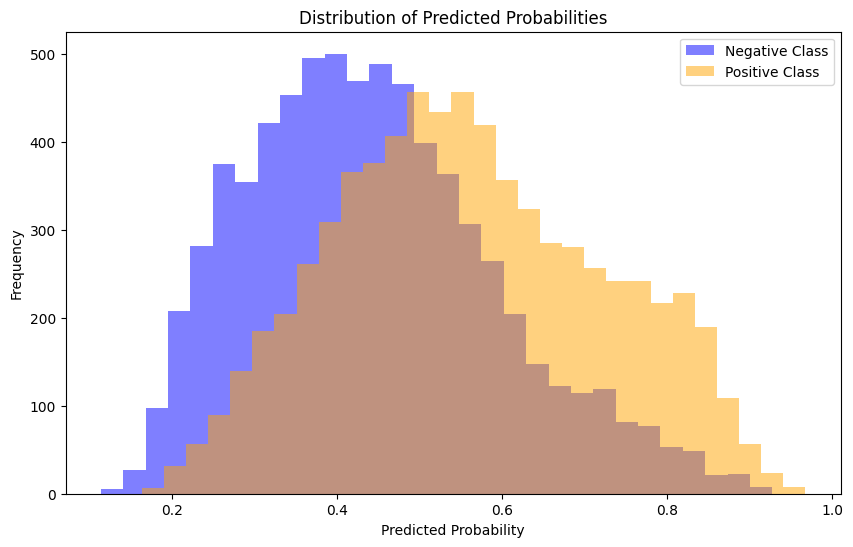

In [36]:
# Obtaining prediction probabilities for class 1 (positive class)
y_prob = model.predict_proba(X_test)[:, 1]

# Creating a graph
plt.figure(figsize=(10, 6))
plt.hist(y_prob[y_test == 0], bins=30, alpha=0.5, color='blue', label='Negative Class')
plt.hist(y_prob[y_test == 1], bins=30, alpha=0.5, color='orange', label='Positive Class')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()

The plot of the distribution of predicted probabilities is about midway between the negative (0) and positive (1) classes, this may indicate that the model is not bad at separating objects of the two classes in terms of probabilities.

**A tool for early detection of cardiovascular disease risk and adoption of recommendations**

In [37]:
# Entering patient data
new_patient_data = np.array([[59, 1, 167, 95, 1, 1, 0, 0, 1]])

# Predicting the likelihood of disease
risk_prob = model.predict_proba(new_patient_data)[0, 1]
rounded_risk = int(round(risk_prob))

if rounded_risk == 1:
    print("Probability of disease: High risk of developing the disease.\n\n"
    "Personalized recommendations:\n"
    "- Lifestyle recommendations: It is recommended to consult your doctor immediately. Follow the specialist's instructions and follow the medication schedule.\n"
    "- Dietary recommendations: Reduce consumption of fatty and salty foods, increase consumption of vegetables, fruits and cereals. Limit the intake of sugar and processed foods.\n"
    "- Physical activity recommendations: Regular physical activity is very important for your health. Aerobic exercise (walking, swimming, bicycling) for at least 30 minutes a day is recommended.\n")
else:
    print("Probability of disease: Low risk of developing the disease.\n\n"
    "Personalized recommendations:\n"
    "- Lifestyle recommendations: It is recommended to maintain a healthy lifestyle, including a balanced diet and physical activity.\n"
    "- Dietary recommendations: Choose natural products, limit the use of fried and fatty foods. It is important to maintain a balance of macro- and microelements.\n"
    "- Physical activity recommendations: Physical activity helps to maintain good health. It is recommended to exercise at least 3 times a week, including aerobic and strength training.\n")

Probability of disease: High risk of developing the disease.

Personalized recommendations:
- Lifestyle recommendations: It is recommended to consult your doctor immediately. Follow the specialist's instructions and follow the medication schedule.
- Dietary recommendations: Reduce consumption of fatty and salty foods, increase consumption of vegetables, fruits and cereals. Limit the intake of sugar and processed foods.
- Physical activity recommendations: Regular physical activity is very important for your health. Aerobic exercise (walking, swimming, bicycling) for at least 30 minutes a day is recommended.



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


As part of this project, we analyzed data on cardiovascular diseases, performed preprocessing, visualization, built a logistic regression model and assessed its quality. This analysis is important for Medica+ Medical Center because it allows us to identify insights and provide recommendations, as well as predict the presence of the disease based on patient data.

1. The influence of factors on the risk of the disease was analyzed:
Identification of dependencies between different factors (age, weight, cholesterol level, smoking, active lifestyle).

2. A tool for early detection of cardiovascular disease risk has been created, allowing the healthcare provider to start preventing and treating patients earlier.

3. Personalized recommendations for the prevention of cardiovascular disease have been developed. This will allow the clinic's doctors to provide personalized recommendations on lifestyle, diet, weight and physical activity.



This project is recommended:

- Develop a mobile app or online platform where patients can enter their data (age, weight, height, lifestyle) and receive regular recommendations and health maintenance advice based on a predictive model.

- Involvement of medical experts to analyze the results and finalize recommendations based on current medical practices.

- Integration with heart rate, blood pressure, activity and sleep measurement devices.


This work has important implications for medical practice by predicting the likelihood of cardiovascular disease and helping to develop recommendations for patients.
This tool can reduce the likelihood of developing cardiovascular disease and improve the quality of life of patients.